Task #2
=======

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()
from scipy.special import kolmogorov

import math

$\xi \sim \mathrm{Bern}(p)$

In [7]:
def gen_bernulli(p, n):
    """Generates random sample [X1, X2,.. X_n] where Xi ~ Bern(n,p)"""
    return [int(np.random.random() < p) for i in range(n)]
#end of gen_bernulli

***Goal:***
* $\delta \sim \mathrm{Cant}$
* $F(\delta)$ -- cantor function  

***Implementation:***

* $\delta = \sum\limits_{i=1}^{\infty} \dfrac{2}{3^i}\xi_i$
* $F(\delta) = \sum\limits_{i=1}^{\infty} \dfrac{1}{2^i}\xi_i$

In [409]:
def gen_cantor(n, eps = 0.0000001):
    """Generates random sample [X1, X2,.. X_n] 
    where Xi ~ Cantor(n) to within eps"""
    result = {"sample": [], "cantor function values": []}

    #find N satisfying precision eps
    N = math.ceil(-math.log(eps,3))

    #getting cantor random value
    pow_3_list = [2.0/pow(3,i) for i in range(1,N+1)]
    cant_rand = lambda x: np.dot(pow_3_list, x)
    #getting cantor function value corresponding cant_rand value of x
    pow_2_list = [1.0/pow(2,i) for i in range(1,N+1)]
    cant_func = lambda x: np.dot(pow_2_list, x)

    for i in range(n):
        sample = gen_bernulli(0.5,N)
        result["sample"].append(cant_rand(sample))
        result["cantor function values"].append(cant_func(sample))
    
    return result

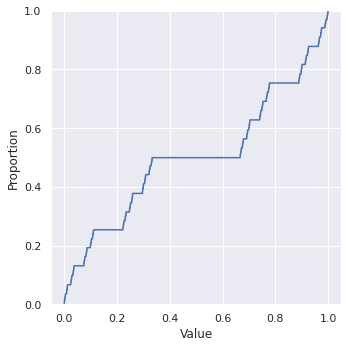

In [11]:
sns.displot(pd.DataFrame({"Value":gen_cantor(10000)["sample"]}), x = "Value", kind = "ecdf")

***Goal:*** $D_n = \sup\limits_{-\infty < x < \infty} 
\left | \hat F_n(x) - F(x) \right |,$
+compute $K(\sqrt{n}D_n)$, where $K(\cdot)$ -- cantor function  

***Implementation:*** $D_n(x_1,\ldots,x_n) = \max\limits_{1\le i \le n} 
\left\{\dfrac{1}{n} - F(x_{(i)}),\: F(x_{(i)}) - \dfrac{i-1}{n}\right\}$

In [491]:
n = 10000
cfval = np.sort(np.array(gen_cantor(n)["cantor function values"]))
Dn = np.max(np.concatenate((1.0/n - cfval,
                                    cfval - [(i-1.0)/n for i in range(1,n+1)]))) 
print(Dn)                                                             
print(kolmogorov(math.sqrt(n)*Dn))

0.005740087890625002
0.8967155502981388
